In [ ]:
%cd /content/
%rm -rf darnet

/content


In [ ]:
!git clone  https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 4 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.17 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.


In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/


MessageError: ignored

In [ ]:
!ln -s /content/gdrive/My\Drive/ /mydrive

In [ ]:
!ls /mydrive/yolov4-tiny/

obj.data  obj.names  obj.zip  process.py  training  yolov4-tiny-custom.cfg


In [ ]:
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
!make

In [ ]:
%cd data/
!find -maxdepth 1 -type f -exec rm -rf {} \;
%cd ..

%rm -rf cfg/
%mkdir cfg

/content/darknet/data
/content/darknet


In [ ]:
#copy the datasets zip file to the root darknet folder
!cp /mydrive/yolov4-tiny/obj.zip ../

# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

In [ ]:
#copy the custom cfg file from the drive to the darknet/cfg folder
!cp /mydrive/yolov4-tiny/yolov4-tiny-custom.cfg ./cfg

In [ ]:
# copy the obj.names and obj.data files so that they are now in /darknet/data/ folder
!cp /mydrive/yolov4-tiny/obj.names ./data
!cp /mydrive/yolov4-tiny/obj.data  ./data

In [ ]:
#copy the process.py file from the drive to the darknet directory
!cp /mydrive/yolov4-tiny/process.py ./

In [ ]:
# run process.py ( this creates the train.txt and test.txt files in our darknet/data folder )
!python process.py

# list the contents of data folder to check if the train.txt and test.txt files have been created 
!ls data/

/content/darknet
labels	obj  obj.data  obj.names  test.txt  train.txt


In [ ]:
# Download the yolov4-tiny pre-trained weights file
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture

!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg yolov4-tiny.conv.29 -dont_show -map

In [ ]:
!nvidia-smi

Mon Jun  5 05:52:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

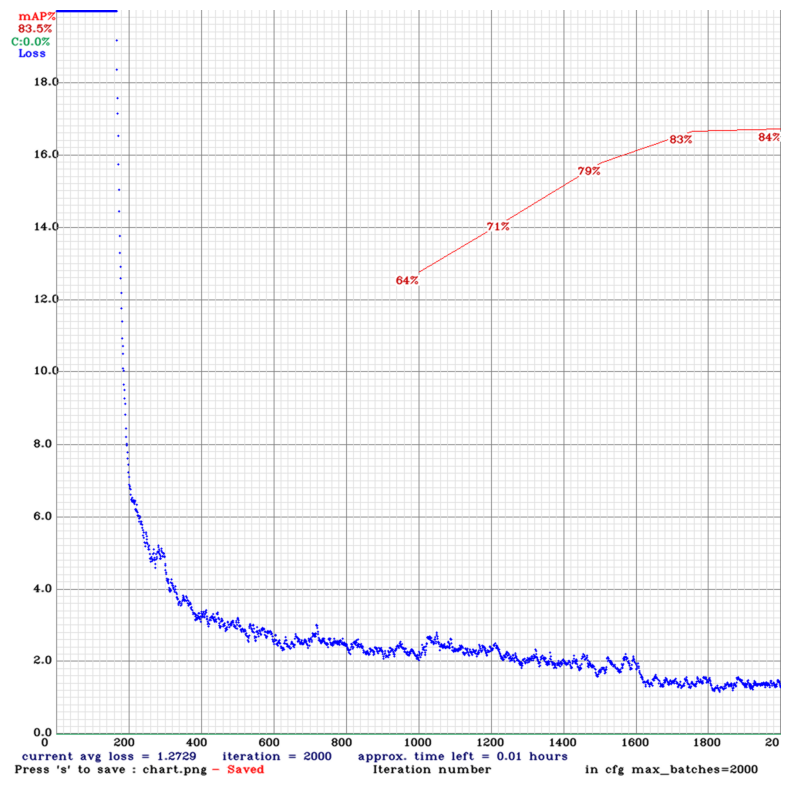

In [ ]:
#only works if the training does not get interrupted 
imShow('chart.png')

In [ ]:
#You can check the mAP for all the saved weights to see which gives the best results ( xxxx here is the saved weight number like 4000, 5000 or 6000 and so on )

!./darknet detector map data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -points 0

In [ ]:
#set your custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-tiny-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-tiny-custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

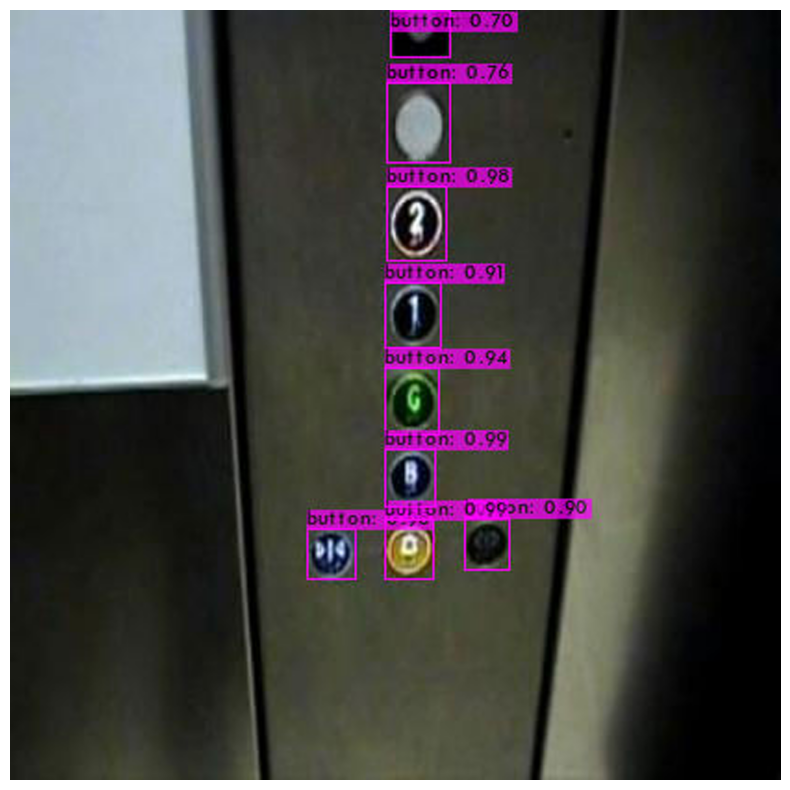

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

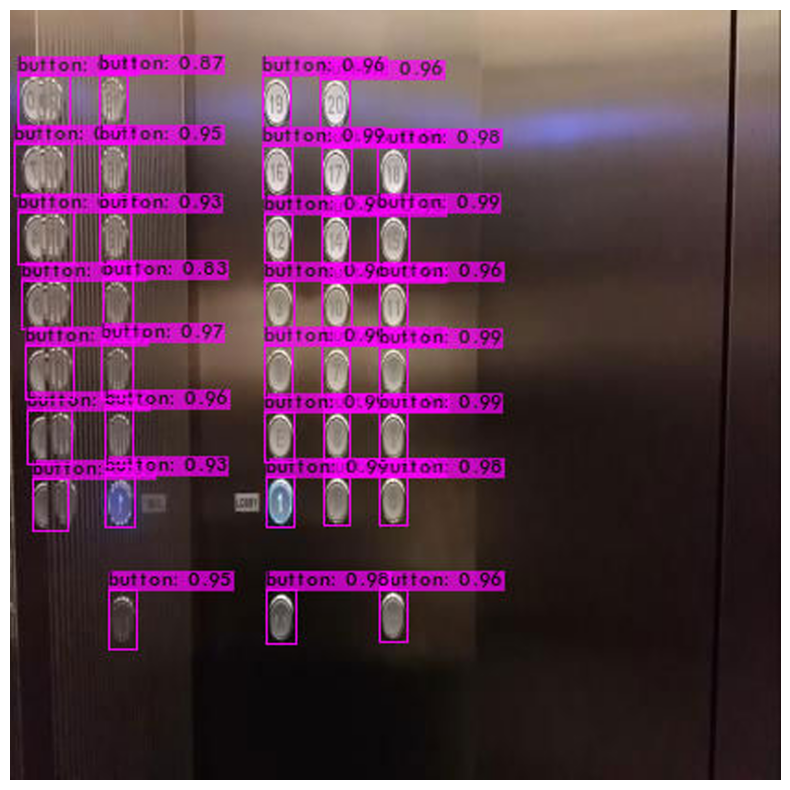

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image2.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

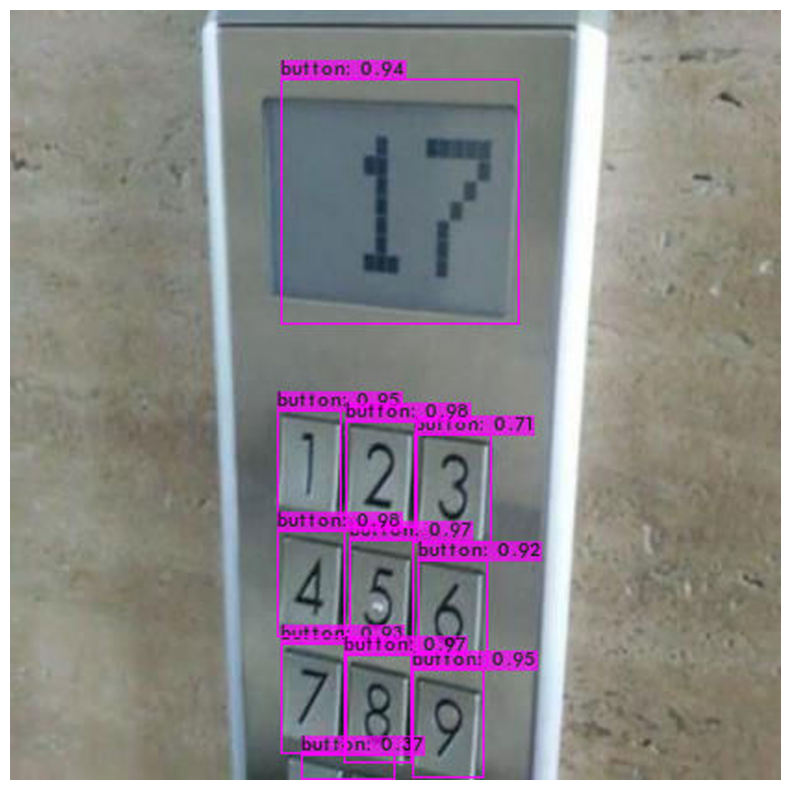

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image3.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

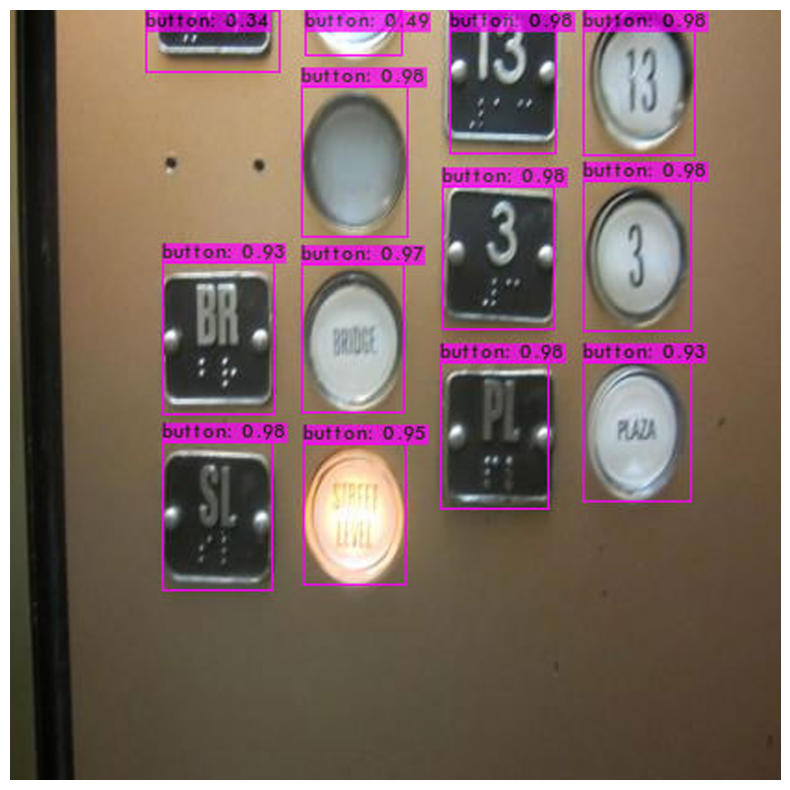

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image4.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

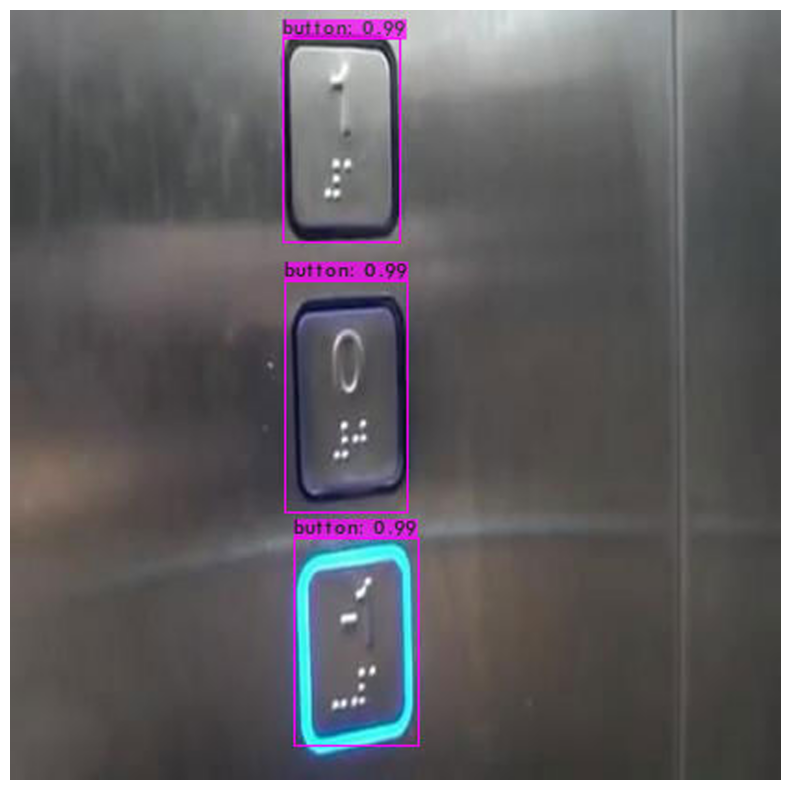

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image5.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

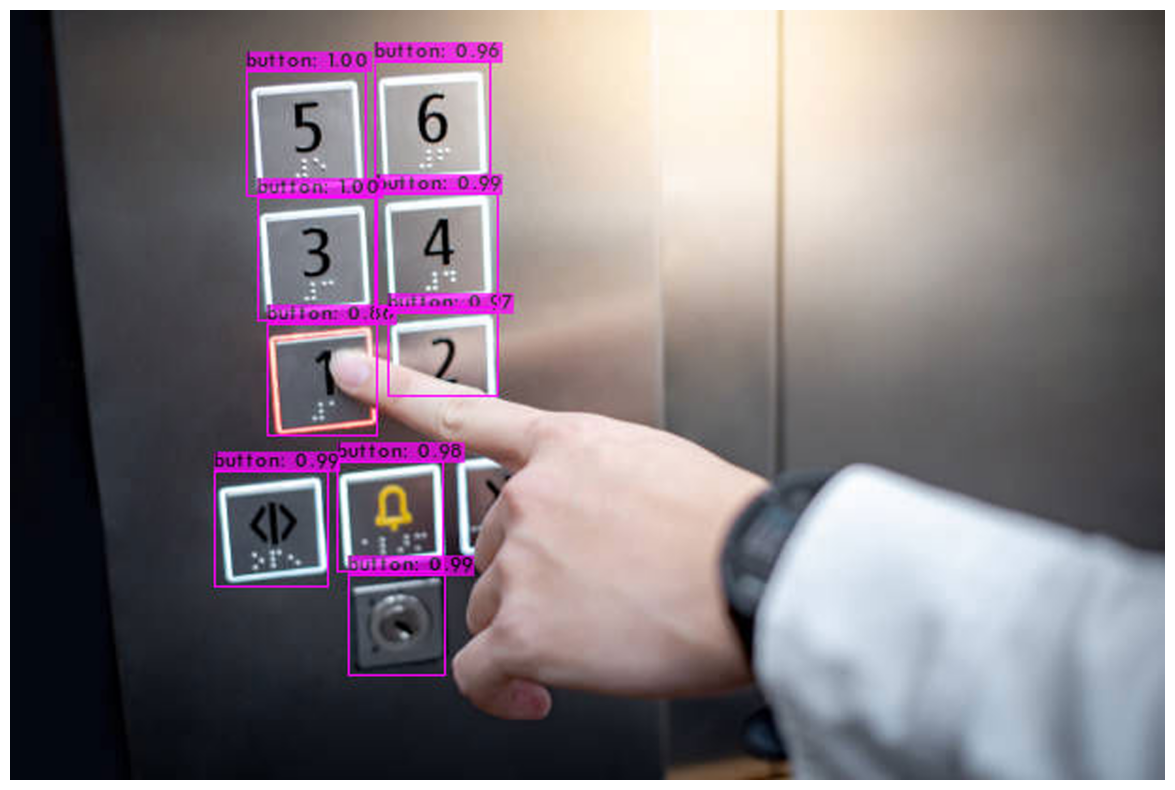

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image8.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	     

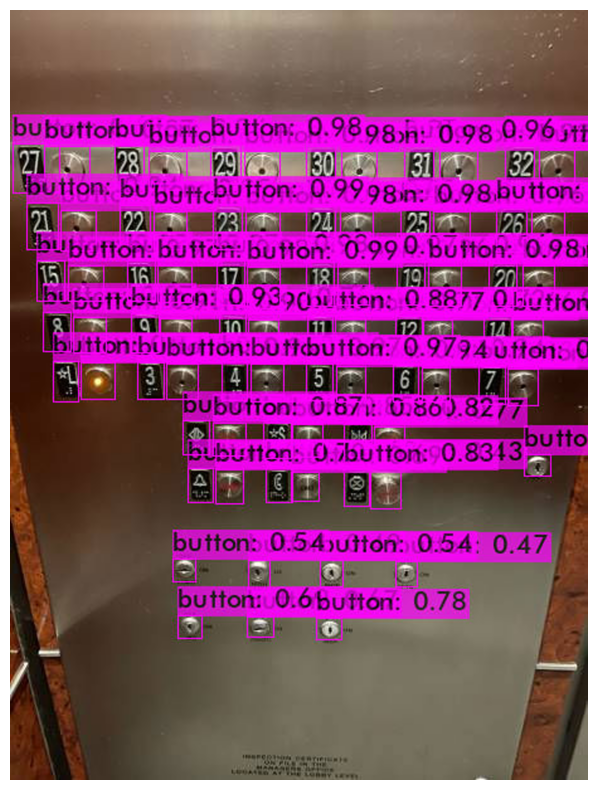

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights /mydrive/mask_test_images/image9.jpg -thresh 0.3
imShow('predictions.jpg')

In [ ]:
#run detector for a video
#!./darknet detector demo data/obj.data cfg/yolov4-tiny-custom.cfg /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights -dont_show /mydrive/mask_test_videos/test3.mp4 -i 0 -out_filename /mydrive/mask_test_videos/result.avi 

In [ ]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract
#!sudo apt-get install tesseract-ocr-ind

In [ ]:
#!git clone https://github.com/theAIGuysCode/yolov4-custom-functions.git

Cloning into 'yolov4-custom-functions'...
remote: Enumerating objects: 251, done.
remote: Total 251 (delta 0), reused 0 (delta 0), pack-reused 251
Receiving objects: 100% (251/251), 62.02 MiB | 30.44 MiB/s, done.
Resolving deltas: 100% (118/118), done.


In [ ]:
#!cp /mydrive/yolov4-tiny/training/yolov4-tiny-custom_best.weights ./yolov4-custom-functions/data

In [ ]:
#!python save_model.py --weights ./yolov4-custom-functions/data/custom.weights --output ./checkpoints/custom-416 --input_size 416 --model yolov4 

python3: can't open file '/content/darknet/save_model.py': [Errno 2] No such file or directory


In [ ]:
#!python3 detect.py --weights ./checkpoints/custom-416 --size 416 --model yolov4 --images /mydrive/mask_test_images/image9.jpg --button

python3: can't open file '/content/darknet/detect.py': [Errno 2] No such file or directory


In [ ]:
#import cv2
#import numpy as np
#import pytesseract
#import matplotlib.pyplot as plt
#from PIL import Image

In [ ]:
#net = cv2.dnn.readNet('/content/gdrive/MyDrive/yolov4-tiny/training', '/content/darknet/cfg/yolov4-tiny-custom.cfg')


error: ignored

In [ ]:
#img = cv2.imread('/mydrive/mask_test_images/image8.jpg')

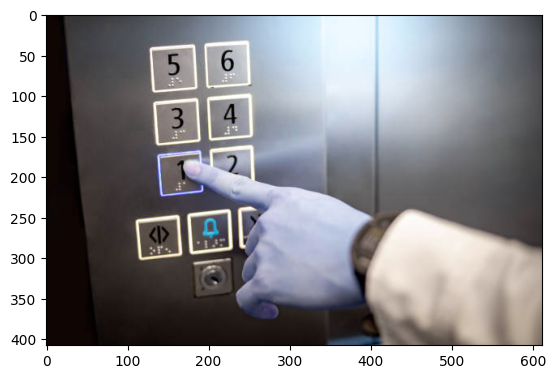

In [ ]:
#plt.imshow(img)

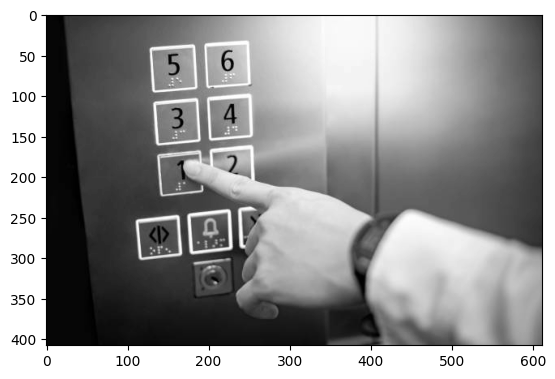

In [ ]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray,cmap = 'gray')

In [ ]:
#th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

In [ ]:
#result = pytesseract.image_to_string((threshed), lang = "ind")

In [ ]:
#for word in result.split("\n"):
#  print(word)